In [2]:
library(Seurat)
library(dplyr)
library(ggplot2)
library(patchwork)
library(tibble)
library(qs)
library(ggplot2)
library(ggridges)
library(tidyr)
library(RColorBrewer)
library(readxl)
library(stringr)
library(ggpubr) 
library(viridis)
library(reshape)
library(forestploter)
library(grid)

seed <- 123
set.seed(seed)
options(dplyr.summarise.inform = FALSE)
setwd("~/integration_project/step_14/11march_final/")


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


qs 0.25.6

Loading required package: viridisLite


Attaching package: ‘reshape’


The following objects are masked from ‘package:tidyr’:

    expand, smiths


The following object is masked from ‘package:dplyr’:

    rename




In [3]:
exl_file <- read_excel("/home/a.garg/integration_project/step_14/11march_final/all_pval_data.xlsx", sheet = "Sheet3", .name_repair = "minimal")

Homeostatic AT8 level 0

In [4]:
data <- exl_file[exl_file$Cell_state == "Homeostatic",]
data$`AT8-pval` <- format(data$`AT8-pval`, digits = 3, scientific = TRUE)
data_long <- gather(data, key = "Layers", value = "Layer_val", `AT8-Level 0`,`AT8-Others`)
data_long <- data_long[data_long$Layers == "AT8-Level 0",]
head(data_long)

Cell_state,AT8-pval,Layer,Reference,Layers,Layer_val
<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>
Homeostatic,2.43e-01,Layer II-VI,All,AT8-Level 0,0.25992063
Homeostatic,4.91e-01,Layer II-III,All,AT8-Level 0,0.20244716
Homeostatic,3.86e-01,Layer IV-VI,All,AT8-Level 0,0.30617726
Homeostatic,4.87e-01,Layer II-VI,Xenografted-mic,AT8-Level 0,0.24404762
Homeostatic,4.52e-01,Layer II-III,Xenografted-mic,AT8-Level 0,0.05450501
Homeostatic,5.42e-01,Layer IV-VI,Xenografted-mic,AT8-Level 0,0.39659803


In [5]:
# for all refrence togetther
box_func <- function(x){
  iqr <- IQR(x)
  q3 <- quantile(x, probs = c(0.25, 0.5, 0.75), names = FALSE)
  c("Homeo_Level0_min" = abs(q3[1] - 1.5*iqr), "Homeo_Level0_q1" = abs(q3[1]), "Homeo_Level0_med" = abs(q3[2]),
    "Homeo_Level0_q3" = abs(q3[3]), "Homeo_Level0_max" = abs(q3[3] + 1.5*iqr))
}

val <- split(data_long$Layer_val, list(data_long$Layer))
val <- lapply(val, box_func)
dat <- do.call(rbind, val)
dat <- data.frame(Layer = row.names(dat),
                  dat, row.names = NULL)


box_func <- function(x){
  iqr <- IQR(x)
  q3 <- quantile(x, probs = c(0.25, 0.5, 0.75), names = FALSE)
  c("Homeo_pval_min" = q3[1] - 1.5*iqr, "Homeo_pval_q1" = q3[1], "Homeo_pval_med" = q3[2],
    "Homeo_pval_q3" = q3[3], "Homeo_pval_max" = q3[3] + 1.5*iqr)
}

p_val <- split(as.numeric(data_long$`AT8-pval`), list(data_long$Layer))
p_val <- lapply(p_val, box_func)
p_dat <- do.call(rbind, p_val)
p_dat <- data.frame(Layer = row.names(p_dat),
                  p_dat, row.names = NULL)
p_dat$Homeostatic <- paste(rep(" ", 20), collapse = " ")

hom_dat1 <- dat %>%
left_join(p_dat, by = "Layer") %>%
select(-c(Homeo_pval_min,Homeo_pval_q1,Homeo_pval_q3,Homeo_pval_max))%>%
mutate(Homeo_Level0_pval = Homeo_pval_med)%>%
select(-c(Homeo_pval_med))

hom_dat1

Layer,Homeo_Level0_min,Homeo_Level0_q1,Homeo_Level0_med,Homeo_Level0_q3,Homeo_Level0_max,Homeostatic,Homeo_Level0_pval
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>
Layer II-III,0.07730812,0.05450501,0.1145717,0.1423804,0.2741935,,0.137
Layer II-VI,0.23735119,0.24404762,0.2470238,0.2485119,0.2552083,,0.590
Layer IV-VI,0.17054611,0.30617726,0.3536258,0.3965980,0.5322292,,0.386


AT8-other

In [6]:
data <- exl_file[exl_file$Cell_state == "Homeostatic",]

data$`AT8-pval` <- format(data$`AT8-pval`, digits = 3, scientific = TRUE)
data_long <- gather(data, key = "Layers", value = "Layer_val", `AT8-Level 0`,`AT8-Others`)

data_long <- data_long[data_long$Layers != "AT8-Level 0",]
head(data_long)

Cell_state,AT8-pval,Layer,Reference,Layers,Layer_val
<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>
Homeostatic,2.43e-01,Layer II-VI,All,AT8-Others,0.23930706
Homeostatic,4.91e-01,Layer II-III,All,AT8-Others,0.21137701
Homeostatic,3.86e-01,Layer IV-VI,All,AT8-Others,0.25916590
Homeostatic,4.87e-01,Layer II-VI,Xenografted-mic,AT8-Others,0.24066592
Homeostatic,4.52e-01,Layer II-III,Xenografted-mic,AT8-Others,0.06077628
Homeostatic,5.42e-01,Layer IV-VI,Xenografted-mic,AT8-Others,0.38620685


In [7]:
# for all refrence togetther
box_func <- function(x){
  iqr <- IQR(x)
  q3 <- quantile(x, probs = c(0.25, 0.5, 0.75), names = FALSE)
  c("Homeo_Other_min" = abs(q3[1] - 1.5*iqr), "Homeo_Other_q1" = abs(q3[1]), "Homeo_Other_med" = abs(q3[2]),
    "Homeo_Other_q3" = abs(q3[3]), "Homeo_Other_max" = abs(q3[3] + 1.5*iqr))
}
val <- split(data_long$Layer_val, list(data_long$Layer))
val <- lapply(val, box_func)
dat <- do.call(rbind, val)
dat <- data.frame(Layer = row.names(dat),
                  dat, row.names = NULL)

box_func <- function(x){
  iqr <- IQR(x)
  q3 <- quantile(x, probs = c(0.25, 0.5, 0.75), names = FALSE)
  c("Homeo_pval_min" = q3[1] - 1.5*iqr, "Homeo_pval_q1" = q3[1], "Homeo_pval_med" = q3[2],
    "Homeo_pval_q3" = q3[3], "Homeo_pval_max" = q3[3] + 1.5*iqr)
}

p_val <- split(as.numeric(data_long$`AT8-pval`), list(data_long$Layer))
p_val <- lapply(p_val, box_func)
p_dat <- do.call(rbind, p_val)
p_dat <- data.frame(Layer = row.names(p_dat),
                  p_dat, row.names = NULL)

hom_dat2 <- dat %>%
left_join(p_dat, by = "Layer") %>%
select(-c(Homeo_pval_min,Homeo_pval_q1,Homeo_pval_q3,Homeo_pval_max))%>%
mutate(Homeo_Other_pval = Homeo_pval_med)%>%
select(-c(Homeo_pval_med))

hom_dat2

Layer,Homeo_Other_min,Homeo_Other_q1,Homeo_Other_med,Homeo_Other_q3,Homeo_Other_max,Homeo_Other_pval
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Layer II-III,0.04077242,0.06563913,0.1074461,0.1365802,0.2429917,0.137
Layer II-VI,0.23385204,0.23794037,0.2393071,0.2406659,0.2447543,0.590
Layer IV-VI,0.08279707,0.25916590,0.3550010,0.3767451,0.5531140,0.386


Activated  AT8 level 0

In [8]:
data <- exl_file[exl_file$Cell_state != "Homeostatic",]
data$`AT8-pval` <- format(data$`AT8-pval`, digits = 3, scientific = TRUE)
data_long <- gather(data, key = "Layers", value = "Layer_val", `AT8-Level 0`,`AT8-Others`)
data_long <- data_long[data_long$Layers == "AT8-Level 0",]
head(data_long)

Cell_state,AT8-pval,Layer,Reference,Layers,Layer_val
<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>
Activated,5.65e-01,Layer II-VI,All,AT8-Level 0,0.2450397
Activated,7.48e-02,Layer II-III,All,AT8-Level 0,0.3392659
Activated,7.08e-03,Layer IV-VI,All,AT8-Level 0,0.1692032
Activated,2.40e-01,Layer II-VI,Xenografted-mic,AT8-Level 0,0.2400794
Activated,5.70e-02,Layer II-III,Xenografted-mic,AT8-Level 0,0.3448276
Activated,6.31e-01,Layer IV-VI,Xenografted-mic,AT8-Level 0,0.1557744


In [9]:
# for all refrence togetther
box_func <- function(x){
  iqr <- IQR(x)
  q3 <- quantile(x, probs = c(0.25, 0.5, 0.75), names = FALSE)
  c("Act_Level0_min" = abs(q3[1] - 1.5*iqr), "Act_Level0_q1" = abs(q3[1]), "Act_Level0_med" = abs(q3[2]),
    "Act_Level0_q3" = abs(q3[3]), "Act_Level0_max" = abs(q3[3] + 1.5*iqr))
}

val <- split(data_long$Layer_val, list(data_long$Layer))
val <- lapply(val, box_func)
dat <- do.call(rbind, val)
dat <- data.frame(Layer = row.names(dat),
                  dat, row.names = NULL)


box_func <- function(x){
  iqr <- IQR(x)
  q3 <- quantile(x, probs = c(0.25, 0.5, 0.75), names = FALSE)
  c("Act_pval_min" = q3[1] - 1.5*iqr, "Act_pval_q1" = q3[1], "Act_pval_med" = q3[2],
    "Act_pval_q3" = q3[3], "Act_pval_max" = q3[3] + 1.5*iqr)
}

p_val <- split(as.numeric(data_long$`AT8-pval`), list(data_long$Layer))
p_val <- lapply(p_val, box_func)
p_dat <- do.call(rbind, p_val)
p_dat <- data.frame(Layer = row.names(p_dat),
                  p_dat, row.names = NULL)
p_dat$Activated <- paste(rep(" ", 20), collapse = " ")

act_dat1 <- dat %>%
left_join(p_dat, by = "Layer") %>%
select(-c(Act_pval_min,Act_pval_q1,Act_pval_q3,Act_pval_max))%>%
mutate(Act_Level0_pval = Act_pval_med)%>%
select(-c(Act_pval_med))

act_dat1

Layer,Act_Level0_min,Act_Level0_q1,Act_Level0_med,Act_Level0_q3,Act_Level0_max,Activated,Act_Level0_pval
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>
Layer II-III,0.2074527,0.3392659,0.3448276,0.4271413,0.5589544,,0.0732
Layer II-VI,0.1976687,0.2400794,0.2450397,0.2683532,0.3107639,,0.2400
Layer IV-VI,0.1177261,0.1405551,0.1539839,0.1557744,0.1786034,,0.0300


AT8-other

In [10]:
data <- exl_file[exl_file$Cell_state != "Homeostatic",]

data$`AT8-pval` <- format(data$`AT8-pval`, digits = 3, scientific = TRUE)
data_long <- gather(data, key = "Layers", value = "Layer_val", `AT8-Level 0`,`AT8-Others`)

data_long <- data_long[data_long$Layers != "AT8-Level 0",]
head(data_long)

Cell_state,AT8-pval,Layer,Reference,Layers,Layer_val
<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>
Activated,5.65e-01,Layer II-VI,All,AT8-Others,0.2480806
Activated,7.48e-02,Layer II-III,All,AT8-Others,0.2747873
Activated,7.08e-03,Layer IV-VI,All,AT8-Others,0.2281746
Activated,2.40e-01,Layer II-VI,Xenografted-mic,AT8-Others,0.2595768
Activated,5.70e-02,Layer II-III,Xenografted-mic,AT8-Others,0.3886679
Activated,6.31e-01,Layer IV-VI,Xenografted-mic,AT8-Others,0.1532512


In [11]:
# for all refrence togetther
box_func <- function(x){
  iqr <- IQR(x)
  q3 <- quantile(x, probs = c(0.25, 0.5, 0.75), names = FALSE)
  c("Act_Other_min" = abs(q3[1] - 1.5*iqr), "Act_Other_q1" = abs(q3[1]), "Act_Other_med" = abs(q3[2]),
    "Act_Other_q3" = abs(q3[3]), "Act_Other_max" = abs(q3[3] + 1.5*iqr))
}

val <- split(data_long$Layer_val, list(data_long$Layer))
val <- lapply(val, box_func)
dat <- do.call(rbind, val)
dat <- data.frame(Layer = row.names(dat),
                  dat, row.names = NULL)

box_func <- function(x){
  iqr <- IQR(x)
  q3 <- quantile(x, probs = c(0.25, 0.5, 0.75), names = FALSE)
  c("Act_pval_min" = q3[1] - 1.5*iqr, "Act_pval_q1" = q3[1], "Act_pval_med" = q3[2],
    "Act_pval_q3" = q3[3], "Act_pval_max" = q3[3] + 1.5*iqr)
}

p_val <- split(as.numeric(data_long$`AT8-pval`), list(data_long$Layer))
p_val <- lapply(p_val, box_func)
p_dat <- do.call(rbind, p_val)
p_dat <- data.frame(Layer = row.names(p_dat),
                  p_dat, row.names = NULL)

act_dat2 <- dat %>%
left_join(p_dat, by = "Layer") %>%
select(-c(Act_pval_min,Act_pval_q1,Act_pval_q3,Act_pval_max))%>%
mutate(Act_Other_pval = Act_pval_med)%>%
select(-c(Act_pval_med))

act_dat2

Layer,Act_Other_min,Act_Other_q1,Act_Other_med,Act_Other_q3,Act_Other_max,Act_Other_pval
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Layer II-III,0.15971977,0.27478726,0.3502678,0.3514989,0.4665664,0.0732
Layer II-VI,0.15864305,0.21230559,0.2269107,0.2480806,0.3017432,0.2400
Layer IV-VI,0.01680002,0.09867076,0.1238877,0.1532512,0.2351220,0.0300


combined all_data

In [12]:
merge(hom_dat1, hom_dat2, by = intersect("Layer", "Layer"), all = FALSE)
merge(act_dat1, act_dat2, by = intersect("Layer", "Layer"), all = FALSE)

merge(x=hom_dat1, y=c(hom_dat2,act_dat1, act_dat2), by = intersect("Layer", "Layer"), all = FALSE)

Layer,Homeo_Level0_min,Homeo_Level0_q1,Homeo_Level0_med,Homeo_Level0_q3,Homeo_Level0_max,Homeostatic,Homeo_Level0_pval,Homeo_Other_min,Homeo_Other_q1,Homeo_Other_med,Homeo_Other_q3,Homeo_Other_max,Homeo_Other_pval
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Layer II-III,0.07730812,0.05450501,0.1145717,0.1423804,0.2741935,,0.137,0.04077242,0.06563913,0.1074461,0.1365802,0.2429917,0.137
Layer II-VI,0.23735119,0.24404762,0.2470238,0.2485119,0.2552083,,0.590,0.23385204,0.23794037,0.2393071,0.2406659,0.2447543,0.590
Layer IV-VI,0.17054611,0.30617726,0.3536258,0.3965980,0.5322292,,0.386,0.08279707,0.25916590,0.3550010,0.3767451,0.5531140,0.386


Layer,Act_Level0_min,Act_Level0_q1,Act_Level0_med,Act_Level0_q3,Act_Level0_max,Activated,Act_Level0_pval,Act_Other_min,Act_Other_q1,Act_Other_med,Act_Other_q3,Act_Other_max,Act_Other_pval
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Layer II-III,0.2074527,0.3392659,0.3448276,0.4271413,0.5589544,,0.0732,0.15971977,0.27478726,0.3502678,0.3514989,0.4665664,0.0732
Layer II-VI,0.1976687,0.2400794,0.2450397,0.2683532,0.3107639,,0.2400,0.15864305,0.21230559,0.2269107,0.2480806,0.3017432,0.2400
Layer IV-VI,0.1177261,0.1405551,0.1539839,0.1557744,0.1786034,,0.0300,0.01680002,0.09867076,0.1238877,0.1532512,0.2351220,0.0300


Layer,Homeo_Level0_min,Homeo_Level0_q1,Homeo_Level0_med,Homeo_Level0_q3,Homeo_Level0_max,Homeostatic,Homeo_Level0_pval,Homeo_Other_min,Homeo_Other_q1,⋯,Act_Level0_max,Activated,Act_Level0_pval,Layer.2,Act_Other_min,Act_Other_q1,Act_Other_med,Act_Other_q3,Act_Other_max,Act_Other_pval
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<chr>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Layer II-III,0.07730812,0.05450501,0.1145717,0.1423804,0.2741935,,0.137,0.04077242,0.06563913,⋯,0.5589544,,0.0732,Layer II-III,0.15971977,0.27478726,0.3502678,0.3514989,0.4665664,0.0732
Layer II-VI,0.23735119,0.24404762,0.2470238,0.2485119,0.2552083,,0.590,0.23385204,0.23794037,⋯,0.3107639,,0.2400,Layer II-VI,0.15864305,0.21230559,0.2269107,0.2480806,0.3017432,0.2400
Layer IV-VI,0.17054611,0.30617726,0.3536258,0.3965980,0.5322292,,0.386,0.08279707,0.25916590,⋯,0.1786034,,0.0300,Layer IV-VI,0.01680002,0.09867076,0.1238877,0.1532512,0.2351220,0.0300


In [14]:
dt <-  merge(x=hom_dat1, y=c(hom_dat2,act_dat1, act_dat2), by = intersect("Layer", "Layer"), all = FALSE)
dt

Layer,Homeo_Level0_min,Homeo_Level0_q1,Homeo_Level0_med,Homeo_Level0_q3,Homeo_Level0_max,Homeostatic,Homeo_Level0_pval,Homeo_Other_min,Homeo_Other_q1,⋯,Act_Level0_max,Activated,Act_Level0_pval,Layer.2,Act_Other_min,Act_Other_q1,Act_Other_med,Act_Other_q3,Act_Other_max,Act_Other_pval
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<chr>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Layer II-III,0.07730812,0.05450501,0.1145717,0.1423804,0.2741935,,0.137,0.04077242,0.06563913,⋯,0.5589544,,0.0732,Layer II-III,0.15971977,0.27478726,0.3502678,0.3514989,0.4665664,0.0732
Layer II-VI,0.23735119,0.24404762,0.2470238,0.2485119,0.2552083,,0.590,0.23385204,0.23794037,⋯,0.3107639,,0.2400,Layer II-VI,0.15864305,0.21230559,0.2269107,0.2480806,0.3017432,0.2400
Layer IV-VI,0.17054611,0.30617726,0.3536258,0.3965980,0.5322292,,0.386,0.08279707,0.25916590,⋯,0.1786034,,0.0300,Layer IV-VI,0.01680002,0.09867076,0.1238877,0.1532512,0.2351220,0.0300


In [15]:
dt$Homeo_Level0_pval <- format(dt$Homeo_Level0_pval, scientific = TRUE)
dt$Act_Level0_pval <- format(dt$Act_Level0_pval, scientific = TRUE)

In [16]:
write.csv(dt,"AT8_layers_forest_val.csv")

In [17]:
colnames(dt) %>% as.list

[[1]]
[1] "Layer"

[[2]]
[1] "Homeo_Level0_min"

[[3]]
[1] "Homeo_Level0_q1"

[[4]]
[1] "Homeo_Level0_med"

[[5]]
[1] "Homeo_Level0_q3"

[[6]]
[1] "Homeo_Level0_max"

[[7]]
[1] "Homeostatic"

[[8]]
[1] "Homeo_Level0_pval"

[[9]]
[1] "Homeo_Other_min"

[[10]]
[1] "Homeo_Other_q1"

[[11]]
[1] "Homeo_Other_med"

[[12]]
[1] "Homeo_Other_q3"

[[13]]
[1] "Homeo_Other_max"

[[14]]
[1] "Homeo_Other_pval"

[[15]]
[1] "Layer.1"

[[16]]
[1] "Act_Level0_min"

[[17]]
[1] "Act_Level0_q1"

[[18]]
[1] "Act_Level0_med"

[[19]]
[1] "Act_Level0_q3"

[[20]]
[1] "Act_Level0_max"

[[21]]
[1] "Activated"

[[22]]
[1] "Act_Level0_pval"

[[23]]
[1] "Layer.2"

[[24]]
[1] "Act_Other_min"

[[25]]
[1] "Act_Other_q1"

[[26]]
[1] "Act_Other_med"

[[27]]
[1] "Act_Other_q3"

[[28]]
[1] "Act_Other_max"

[[29]]
[1] "Act_Other_pval"

In [18]:
 tm <- forest_theme(base_size = 10,
                  refline_lty = "dotted",
                   ci_pch = c(15, 18),
                     ci_alpha = 0.8,
                   ci_lty = 1,
                   ci_lwd = 1.5,
                   ci_Theight = 0.2, # Set an T end at the end of CI 
                   ci_col = c("#000000","#808080"),
                   footnote_col = "blue",
                   legend_name = "",
                   legend_value = c("Proximal", "Distal"),
                   core=list(
                    padding = unit(c(4, 3), "mm"),
                    fg_params=list(hjust = 1, x = 0.9)
                    #bg_params=list(fill = c("#C0C0C0","#F5F5F5"))
                    ),
                   colhead=list(fg_params=list(hjust=0.5, x=0.5))
                   
                   )

In [19]:
dt <- dt[c(2,1,3),]

In [20]:
colnames(dt)[8] <- "Pval"
colnames(dt)[22] <- "Pval"

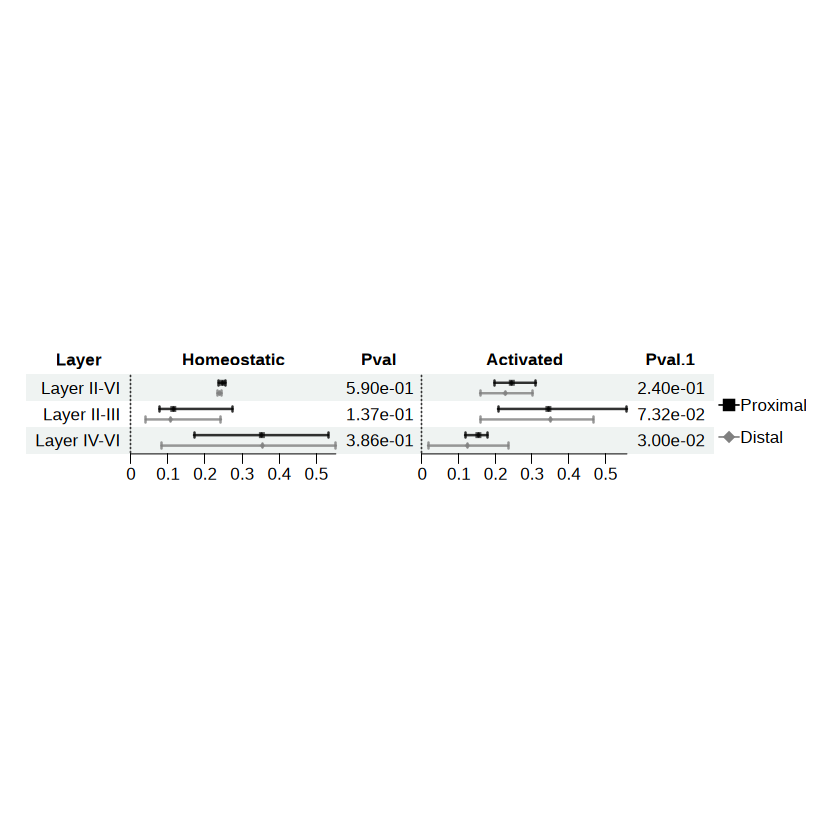

In [21]:
p <- forest(dt[,c(1,7,8,21,22)],
est = list(dt$Homeo_Level0_med,dt$Act_Level0_med,dt$Homeo_Other_med,dt$Act_Other_med),
lower = list(dt$Homeo_Level0_min,dt$Act_Level0_min,dt$Homeo_Other_min,dt$Act_Other_min),
upper = list(dt$Homeo_Level0_max,dt$Act_Level0_max,dt$Homeo_Other_max,dt$Act_Other_max),
            ci_column = c(2, 4),
            nudge_y = 0.4,
            theme = tm)
ggsave(p,filename = "AT8_Forestplot_inlayer.pdf",height = 4, width = 8)
p